In [75]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [76]:
iris = load_iris()

In [77]:
data = iris.data

In [78]:
list(set(iris.target))

[0, 1, 2]

In [79]:
data = np.column_stack((data,iris.target))
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [80]:
x, y = np.split(data, (4,), axis=1)

In [81]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
x = x[:, :2]
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

In [31]:
x_train.shape

(90, 2)

In [70]:
from time import time #随时监控我们的模型的运行时间
import datetime
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = svm.SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
            ).fit(x_train, y_train.ravel())
    result = clf.predict(x_test) #获取模型的预测结果
    score = clf.score(x_test,y_test.ravel()) #接口score返回的是准确度accuracy
    print("%s 's testing accuracy %f" %(kernel,score))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.783333
00:00:001995
poly 's testing accuracy 0.800000
00:00:002993
rbf 's testing accuracy 0.800000
00:00:004987
sigmoid 's testing accuracy 0.316667
00:00:005985


In [71]:
clf = svm.SVC(C=0.8, kernel='rbf', gamma="auto", decision_function_shape='ovr')

In [72]:
clf.fit(x_train, y_train.ravel())

SVC(C=0.8, gamma='auto')

In [74]:
 # 精度
print (clf.score(x_train, y_train))
y_hat = clf.predict(x_train)
precision = sum(y_hat == y_train.ravel())/y_train.shape[0]
print(precision)
print (clf.score(x_test, y_test))
y_hat = clf.predict(x_test)
precision = sum(y_hat == y_test.ravel())/y_test.shape[0]
print(precision)

0.8111111111111111
0.8111111111111111
0.8
0.8


In [66]:
print('decision_function:\n', clf.decision_function(x_train))
print('\npredict:\n', clf.predict(x_train))

decision_function:
 [[ 1.52816854  1.42157481  0.49205798]
 [-1.38322749 -1.0002979   1.02057839]
 [-1.57507166 -1.62326822  0.02263046]
 [ 0.97634015  1.07214827  0.75178206]
 [ 1.39264628  1.33948373  0.59840268]
 [-1.3505309  -1.57806657 -0.72679485]
 [ 1.66311679  1.5037671   0.45142932]
 [-1.21427773 -1.25094913 -0.17738387]
 [-1.15322624 -1.41005748 -1.000471  ]
 [-1.22072396 -1.54007215 -1.05075893]
 [-1.01655286 -0.79371958  0.67488482]
 [-1.04158477 -1.37332303 -1.25817636]
 [-1.11908914 -1.1088538  -0.02581729]
 [ 1.50412516  1.41950368  0.10637624]
 [-1.67239725 -1.34719466  1.01746953]
 [-1.43900169 -1.59813776 -0.44602503]
 [-1.3505309  -1.57806657 -0.72679485]
 [-0.56819538  0.11389186  1.07197655]
 [-0.94983857 -1.13629004 -0.89272135]
 [-1.11889819 -0.6489503   1.13061849]
 [ 0.99963421  0.9623388  -0.06885336]
 [ 1.0005862   1.05885725  0.71983568]
 [ 1.47079895  1.42564981 -0.13330034]
 [-1.04158477 -1.37332303 -1.25817636]
 [ 1.32136658  1.30357787  0.51074623]
 [-1.

In [83]:
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

In [68]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [71]:
x1 = iris.data
y1 = iris.target

In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

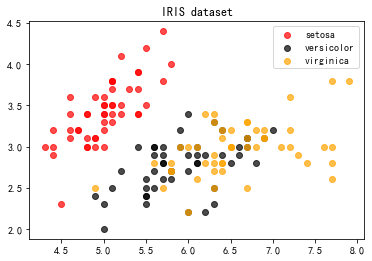

In [73]:
colors = ['red', 'black', 'orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(x1[y1 == i, 0]
                ,x1[y1 == i, 1]
                ,alpha=.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('IRIS dataset')
plt.show()

D:\Program Files (x86)\Python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


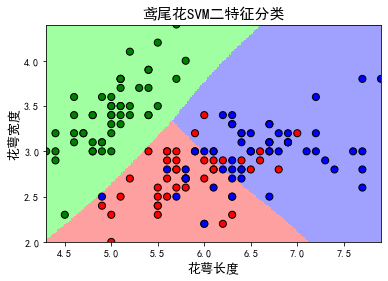

In [69]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(iris.data,iris.target,test_size=0.3)  #分为训练集与测试集，测试集占30%

In [4]:
print(Xtrain.shape)
print(Xtest.shape)

(105, 4)
(45, 4)


In [10]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")   #第一步：实例化   注：criterion默认是gini系数，当然可以将其修改为信息熵entropy
clf = clf.fit(Xtrain,Ytrain) #第二步：训练
score = clf.score(Xtest,Ytest)  #第三步：返回预测的准确度accuracy
score

0.9111111111111111

In [9]:
clf = tree.DecisionTreeClassifier(criterion = "entropy"
                                  ,random_state=20
                                  ,splitter="random"
                                 )   #第一步：实例化  
clf = clf.fit(Xtrain,Ytrain) #第二步：训练
score = clf.score(Xtest,Ytest)  #第三步：返回预测的准确度accuracy

score

0.9111111111111111

In [6]:
clf.feature_importances_ #查看各个属性的重要程度

array([0.01951378, 0.01656592, 0.8946178 , 0.06930251])

In [7]:
[*zip(iris.feature_names,clf.feature_importances_)]  #连成元组

[('sepal length (cm)', 0.019513777218548113),
 ('sepal width (cm)', 0.016565915978327485),
 ('petal length (cm)', 0.8946177971496144),
 ('petal width (cm)', 0.06930250965350987)]

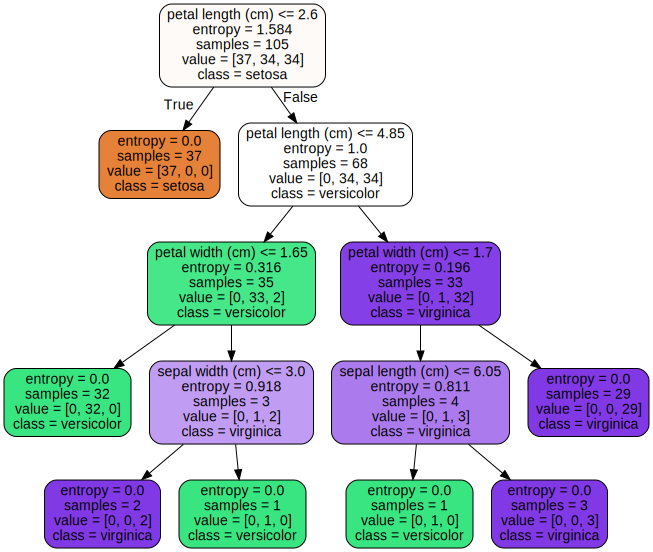

In [8]:
import graphviz #可视化组件，需自己安装，配置环境变量等
dot_data = tree.export_graphviz(clf
                                ,feature_names = iris.feature_names
                                ,class_names = iris.target_names
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph